In [1]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [2]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [3]:
df = pd.read_csv("data/cleaned.csv")
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df.head()

,timestamp,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
0,2018-01-01 00:02:30,1292.358276,303325.5625,304403.8125,76.793610,147.000000,4235.593262,137.116119,144.290588,9.771034,3589.286377,24.972260,16.881464,0.274836,226.737091,98.086472
1,2018-01-01 00:15:45,1280.951782,303501.2188,306518.3438,75.740501,147.000000,4237.000000,137.001038,144.234497,9.445200,3589.314209,24.914534,16.850445,0.291397,226.697098,98.296577
2,2018-01-01 00:23:30,1301.558716,303439.5625,304557.9375,76.408760,146.000000,4230.842773,136.933716,144.201675,9.469283,3589.330566,25.057545,16.832302,0.267696,226.673706,98.419472
3,2018-01-01 00:25:00,1277.910767,303409.8125,305721.0313,76.574921,145.693817,4243.306152,136.920685,144.195328,9.759820,3589.333740,25.000223,16.828791,0.264931,226.669174,98.443253
4,2018-01-01 00:38:00,1291.603882,303493.1250,303782.2188,77.575714,147.308044,4233.544922,136.807770,144.140289,9.620083,3589.361084,24.901915,16.822590,0.274948,226.629944,98.862801


## Splitting Data

In [4]:
# Defining X and y variables
X = df.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df['Pump Radial Bearing Vibration']

#### Split for linear regression

In [7]:
# Using only a sample of data for train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)

## Initial Baseline Modelling- Linear Regression

In [9]:
normalized_lr = Pipeline([('scaler', MinMaxScaler()), ('Lr', LinearRegression(n_jobs=-1))])

sbs = sfs(normalized_lr, k_features=11, forward=False, floating=False, scoring='r2', cv=3, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.0s finished

[2022-07-24 12:43:48] Features: 13/11 -- score: 0.6345453724523011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.0s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.3s finished

[2022-07-24 12:43:52] Features: 12/11 -- score: 0.6344953552828599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.9s finished

[2022-07-24 12:43:55] Features: 11/11 -- score: 0.6344017001655035

In [10]:
sbs.k_feature_names_

('Heat Recovery System Header Mass Flow.1',
 'Motor Current Phase A',
 'Motor Voltage',
 'Pump Journal 1 Bearing Temperature',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Pump Suction Temperature',
 'Pump Thrust Bearing Temperature 1')

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X[list(sbs.k_feature_names_)],y,train_size=0.15,test_size=0.45 ,random_state=42)

In [14]:
pipe = Pipeline([('poly_features',PolynomialFeatures(2, include_bias=False, interaction_only=True)),
                        ('scaler', MinMaxScaler()), 
                        ('Lr', LinearRegression(n_jobs=-1))])

model = pipe.fit(X_train, y_train)

In [18]:
y_pred = model.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.7217
mean_squared_log_error:  0.003
r2:  0.7217
MAE:  0.426
MSE:  0.2971
RMSE:  0.545


In [19]:
y_pred_test = model.predict(X_test)
regression_results(y_test.values, y_pred_test)

explained_variance:  0.7219
mean_squared_log_error:  0.003
r2:  0.7219
MAE:  0.4253
MSE:  0.2968
RMSE:  0.5448


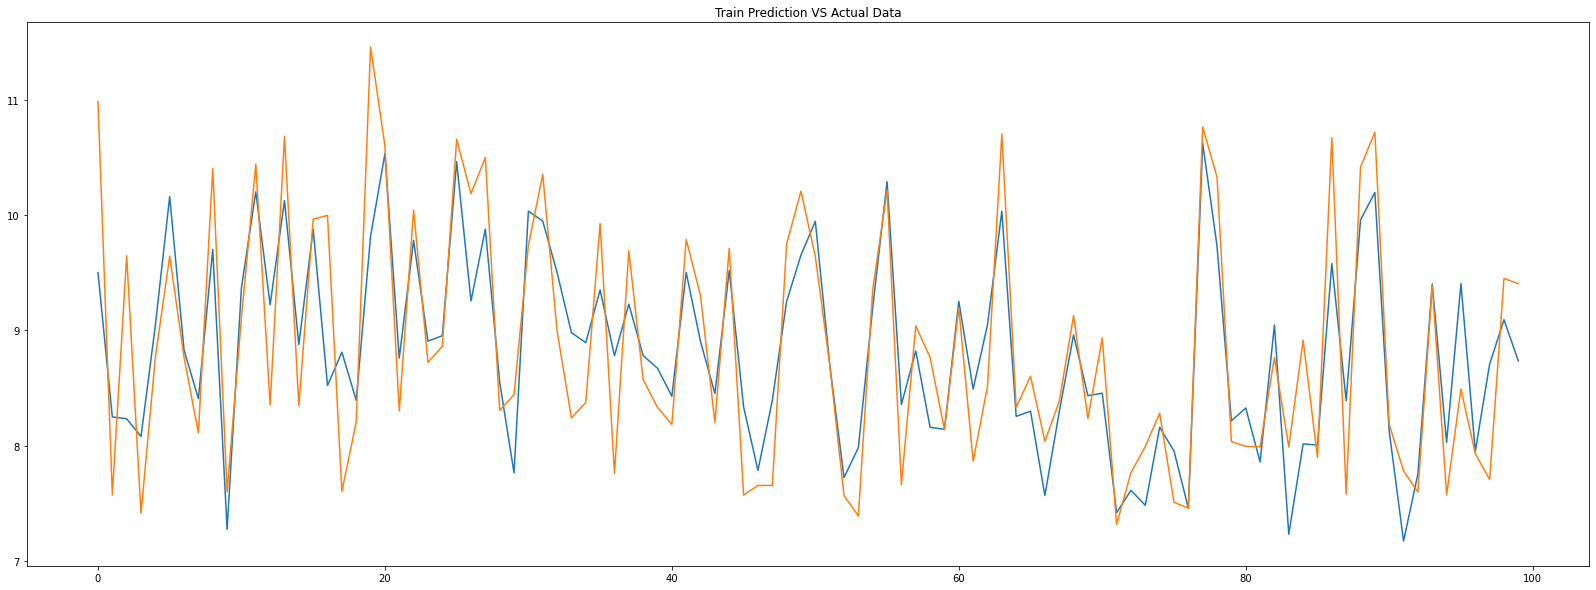

In [21]:
plt.figure(figsize=[28,10])
plt.plot(y_pred[:100])
plt.plot(y_train.values[:100])
plt.title("Train Prediction VS Actual Data")
plt.show()

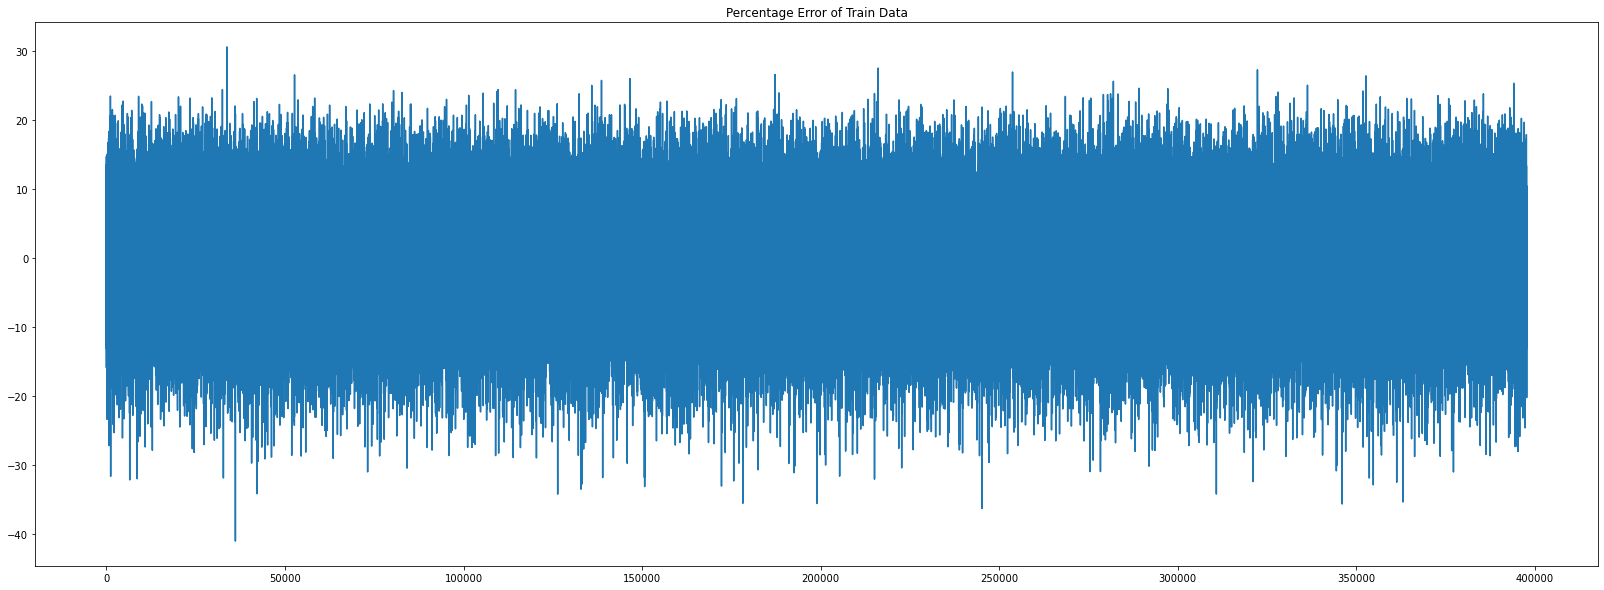

In [24]:
perc_error = (y_train.values - y_pred)/y_train.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.title("Percentage Error of Train Data")
plt.show()

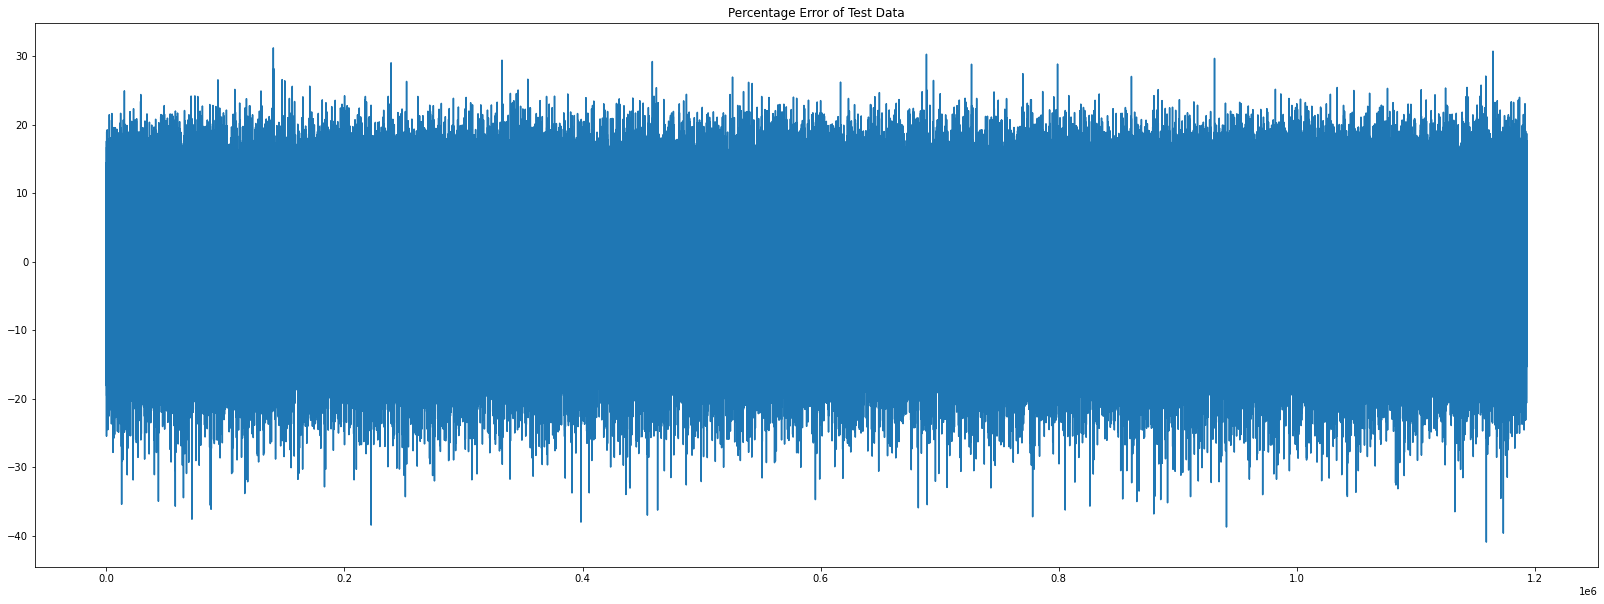

In [25]:
perc_error = (y_test.values - y_pred_test)/y_test.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.title("Percentage Error of Test Data")
plt.show()

Although the evaluation matrix of train and test data are very similar the errror plots are easily breaching +/-20 threshold. This might be a sign of underfitting.

## XGBoost Modelling

### Feature Selection

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [6]:
from sklearn.model_selection import StratifiedKFold

In [11]:
# def model(X_train,y_train):
#     pars = {
#         'colsample_bytree': 0.8,                 
#         'learning_rate': 0.08,
#         'max_depth': 9,
#         'subsample': 0.8,
#         'objective':'reg:squarederror',
#         'eval_metric':'neg_mean_absolute_error',
#         'min_child_weight':3,
#         'gamma':0.25,
#         'n_estimators':110
#     }
#     dtrain_matrix = xgb.DMatrix(X_train, label=y_train)

#     xgb_model = xgb.cv(
#                     params = pars,
#                     dtrain = dtrain_matrix,
#                     num_boost_round=150,  # Maximum iterations
#                     nfold=5, # Number of folds to use
#                     metrics = 'rmse', # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
#                     as_pandas = True,
#                     seed = 42,
#                     early_stopping_rounds = 10, # Training with a validation set will stop if the performance doesn't improve for n rounds.
#                     )
        
#     train_y_pred = xgb_model.predict(X_train)
#     scores = mean_squared_error(y_train.values,train_y_pred)
    
#     return xgb_model

In [12]:
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)


[0]	validation_0-mae:7.77602
[1]	validation_0-mae:7.23172
[2]	validation_0-mae:6.72552
[3]	validation_0-mae:6.25476
[4]	validation_0-mae:5.81698
[5]	validation_0-mae:5.40981
[6]	validation_0-mae:5.03116
[7]	validation_0-mae:4.67899
[8]	validation_0-mae:4.35146
[9]	validation_0-mae:4.04688
[10]	validation_0-mae:3.76362
[11]	validation_0-mae:3.50020
[12]	validation_0-mae:3.25520
[13]	validation_0-mae:3.02733
[14]	validation_0-mae:2.81540
[15]	validation_0-mae:2.61829
[16]	validation_0-mae:2.43504
[17]	validation_0-mae:2.26459
[18]	validation_0-mae:2.10610
[19]	validation_0-mae:1.95866
[20]	validation_0-mae:1.82160
[21]	validation_0-mae:1.69416
[22]	validation_0-mae:1.57569
[23]	validation_0-mae:1.46565
[24]	validation_0-mae:1.36347
[25]	validation_0-mae:1.26859
[26]	validation_0-mae:1.18058
[27]	validation_0-mae:1.09897
[28]	validation_0-mae:1.02337
[29]	validation_0-mae:0.95344
[30]	validation_0-mae:0.88872
[31]	validation_0-mae:0.82896
[32]	validation_0-mae:0.77382
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [13]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance

{'Auxiliary Boilers Feed Water Header Pressure': 1.9499975442886353,
 'Heat Recovery System Header Mass Flow': 128.97808837890625,
 'Heat Recovery System Header Mass Flow.1': 140.85377502441406,
 'Lube Oil Tank Temperature': 1622.9287109375,
 'Motor Current Phase A': 183.65878295898438,
 'Motor Voltage': 1252.4349365234375,
 'Pump Journal 1 Bearing Temperature': 67.7179946899414,
 'Pump Journal 2 Bearing Temperature': 124.65560913085938,
 'Pump Shaft Speed': 364.61810302734375,
 'Pump Suction Pressure 1': 895.7115478515625,
 'Pump Suction Pressure 2': 296.4747009277344,
 'Pump Suction Strainer Differential Pressure': 221.0781707763672,
 'Pump Suction Temperature': 64.78948974609375,
 'Pump Thrust Bearing Temperature 1': 499.4141845703125}

In [14]:
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,1622.928711
1,Motor Voltage,1252.434937
2,Pump Suction Pressure 1,895.711548
3,Pump Thrust Bearing Temperature 1,499.414185
4,Pump Shaft Speed,364.618103
5,Pump Suction Pressure 2,296.474701
6,Pump Suction Strainer Differential Pressure,221.078171
7,Motor Current Phase A,183.658783
8,Heat Recovery System Header Mass Flow.1,140.853775
9,Heat Recovery System Header Mass Flow,128.978088


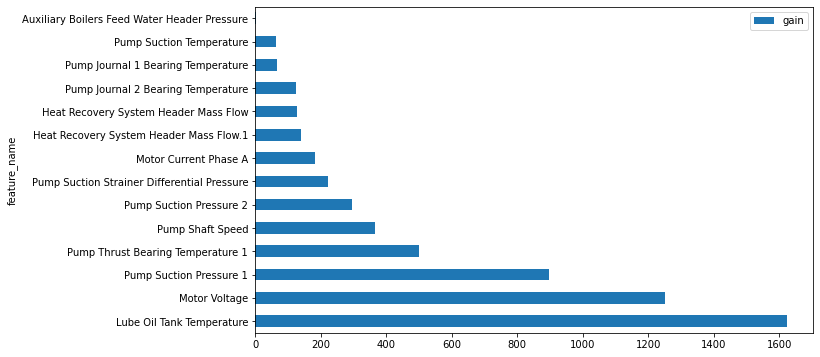

In [15]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [16]:
selected_cols = feature_score["feature_name"].values[:11]
selected_cols

array(['Lube Oil Tank Temperature', 'Motor Voltage',
       'Pump Suction Pressure 1', 'Pump Thrust Bearing Temperature 1',
       'Pump Shaft Speed', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Mass Flow',
       'Pump Journal 2 Bearing Temperature'], dtype=object)

## Modelling and tuning on selected columns

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, train_size=0.6, random_state=42)

In [37]:
regressor = xgb.XGBRegressor(tree_method='hist', objective='reg:squarederror', early_stopping_rounds=10)

### Attempting Parameter Tuning Using Random CV

In [38]:
## Hyper Parameter Optimization


n_estimators = [ 90, 100, 120, 130, 150]
max_depth = [7, 8, 9, 10, 11, 12]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.07, 0.08,0.1,0.12]
min_child_weight = [5,6,7,8,9]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    }

In [41]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
            
eval_set = [(X_test, y_test)]
random_cv.fit(X_train,y_train, eval_set=eval_set)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-rmse:7.75274
[1]	validation_0-rmse:7.13452
[2]	validation_0-rmse:6.56577
[3]	validation_0-rmse:6.04263
[4]	validation_0-rmse:5.56148
[5]	validation_0-rmse:5.11888
[6]	validation_0-rmse:4.71182
[7]	validation_0-rmse:4.33748
[8]	validation_0-rmse:3.99311
[9]	validation_0-rmse:3.67640
[10]	validation_0-rmse:3.38522
[11]	validation_0-rmse:3.11746
[12]	validation_0-rmse:2.87137
[13]	validation_0-rmse:2.64508
[14]	validation_0-rmse:2.43711
[15]	validation_0-rmse:2.24592
[16]	validation_0-rmse:2.07029
[17]	validation_0-rmse:1.90889
[18]	validation_0-rmse:1.76071
[19]	validation_0-rmse:1.62467
[20]	validation_0-rmse:1.49984
[21]	validation_0-rmse:1.38520
[22]	validation_0-rmse:1.28006
[23]	validation_0-rmse:1.18372
[24]	validation_0-rmse:1.09552
[25]	validation_0-rmse:1.01479
[26]	validation_0-rmse:0.94092
[27]	validation_0-rmse:0.87313
[28]	validation_0-rmse:0.81121
[29]	validation_0-rmse:0.75455
[30]	validation_0-

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=10,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.07, 0.08, 0.1,
                                                          0.12],
                                        'max_depth': [7, 8, 9, 10, 11, 12],
                                        'min_child_weight': [5, 6, 7, 8, 9],
                                        'n_estimators': [90, 100, 120, 130,
                                                         150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [42]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
best_max_depth = random_cv.best_estimator_.max_depth
best_n_est = random_cv.best_estimator_.n_estimators
best_min_weight = random_cv.best_estimator_.min_child_weight
best_lr = random_cv.best_estimator_.learning_rate

regressor=xgb.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=best_lr, 
             max_depth=best_max_depth, 
             min_child_weight=best_min_weight,
             n_estimators=best_n_est,
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )
             
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:7.75274
[1]	validation_0-rmse:7.13452
[2]	validation_0-rmse:6.56577
[3]	validation_0-rmse:6.04263
[4]	validation_0-rmse:5.56148
[5]	validation_0-rmse:5.11888
[6]	validation_0-rmse:4.71182
[7]	validation_0-rmse:4.33748
[8]	validation_0-rmse:3.99311
[9]	validation_0-rmse:3.67640
[10]	validation_0-rmse:3.38522
[11]	validation_0-rmse:3.11746
[12]	validation_0-rmse:2.87137
[13]	validation_0-rmse:2.64508
[14]	validation_0-rmse:2.43711
[15]	validation_0-rmse:2.24592
[16]	validation_0-rmse:2.07029
[17]	validation_0-rmse:1.90889
[18]	validation_0-rmse:1.76071
[19]	validation_0-rmse:1.62467
[20]	validation_0-rmse:1.49984
[21]	validation_0-rmse:1.38520
[22]	validation_0-rmse:1.28006
[23]	validation_0-rmse:1.18372
[24]	validation_0-rmse:1.09552
[25]	validation_0-rmse:1.01479
[26]	validation_0-rmse:0.94092
[27]	validation_0-rmse:0.87313
[28]	validation_0-rmse:0.81121
[29]	validation_0-rmse:0.75455
[30]	validation_0-rmse:0.70316
[31]	validation_0-rmse:0.65629
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
             missing=nan, monotone_constraints='()', n_estimators=150,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred = regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.9663
mean_squared_log_error:  0.0004
r2:  0.9663
MAE:  0.1403
MSE:  0.036
RMSE:  0.1897


In [45]:
y_test_pred = regressor.predict(X_test)
regression_results(y_test, y_test_pred)

explained_variance:  0.9593
mean_squared_log_error:  0.0004
r2:  0.9593
MAE:  0.1522
MSE:  0.0434
RMSE:  0.2083


Evalution metrics on train and test data differ by around 30%, which signify overfitting and the random cv is returning parameters which maybe too high.

In [17]:
from bayes_opt import BayesianOptimization
def baye_opt(max_depth, min_child_weight, n_estimators, learning_rate, colsample_bytree):
            params_opt = {}
            params_opt['max_depth'] = int(max_depth)
            params_opt['min_child_weight'] = int(min_child_weight)
            params_opt['colsample_bytree'] = colsample_bytree
            params_opt['learning_rate'] = learning_rate
            params_opt['n_estimators'] = int(n_estimators)

            scores = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', 
                                                        tree_method='hist', 
                                                        **params_opt), 
                                                        X_train, y_train, 
                                                        scoring='neg_mean_absolute_error', 
                                                        cv=5).mean()
            return float(scores.mean())

In [18]:
# params = {'max_depth': (5, 11), 'min_child_weight':(4, 10), 'n_estimators': (70, 130), 'eta':(0.05, 0,12), 'colsample_bytree': (0.3, 0.9)}
params ={'max_depth':(8, 11),
            'min_child_weight': (3, 9),
            'colsample_bytree':(0.6, 1),
            'learning_rate':(0.05, 0.13),
            'n_estimators':(100, 120)
}
xgb_bo = BayesianOptimization(baye_opt, params)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=20, acq='ei')

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.2005   |  0.6942   |  0.1172   |  8.634    |  8.866    |  114.8    |
|  2        | -0.2071   |  0.7112   |  0.1028   |  8.95     |  8.038    |  108.9    |
|  3        | -0.2061   |  0.6467   |  0.06338  |  9.275    |  3.322    |  101.0    |
|  4        | -0.1738   |  0.9503   |  0.08864  |  10.76    |  5.813    |  100.5    |
|  5        | -0.1821   |  0.6811   |  0.06331  |  10.96    |  4.212    |  114.2    |
|  6        | -0.225    |  0.7608   |  0.06441  |  8.992    |  6.798    |  101.5    |
|  7        | -0.1792   |  0.7106   |  0.1232   |  9.907    |  8.114    |  117.8    |
|  8        | -0.1688   |  0.9756   |  0.09181  |  10.64    |  7.836    |  115.6    |
|  9        | -0.1627   |  0.9304   |  0.1172   |  10.77    |  7.744    |  115.6    |
|  10       | -0.1472   |  0.806    |  0.13     |  11.

In [19]:
xgb_bo.max['params']

{'colsample_bytree': 0.8060037971290211,
 'learning_rate': 0.13,
 'max_depth': 11.0,
 'min_child_weight': 7.494014835200355,
 'n_estimators': 115.62365267579406}

In [20]:
regressor=xgb.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=xgb_bo.max['params']['learning_rate'], 
             max_depth=int(xgb_bo.max['params']['max_depth']), 
             min_child_weight=int(xgb_bo.max['params']['min_child_weight']),
             n_estimators=int(xgb_bo.max['params']['n_estimators']),
             colsample_bytree=xgb_bo.max['params']['colsample_bytree'],
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )

In [21]:
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:7.33330
[1]	validation_0-rmse:6.38368
[2]	validation_0-rmse:5.55788
[3]	validation_0-rmse:4.83930
[4]	validation_0-rmse:4.21483
[5]	validation_0-rmse:3.67171
[6]	validation_0-rmse:3.19942
[7]	validation_0-rmse:2.78925
[8]	validation_0-rmse:2.43272
[9]	validation_0-rmse:2.12306
[10]	validation_0-rmse:1.85454
[11]	validation_0-rmse:1.62154
[12]	validation_0-rmse:1.41941
[13]	validation_0-rmse:1.24460
[14]	validation_0-rmse:1.09369
[15]	validation_0-rmse:0.96296
[16]	validation_0-rmse:0.85037
[17]	validation_0-rmse:0.75383
[18]	validation_0-rmse:0.67163
[19]	validation_0-rmse:0.60069
[20]	validation_0-rmse:0.54113
[21]	validation_0-rmse:0.49016
[22]	validation_0-rmse:0.44780
[23]	validation_0-rmse:0.41183
[24]	validation_0-rmse:0.38185
[25]	validation_0-rmse:0.35675
[26]	validation_0-rmse:0.33647
[27]	validation_0-rmse:0.32031
[28]	validation_0-rmse:0.30583
[29]	validation_0-rmse:0.29427
[30]	validation_0-rmse:0.28528
[31]	validation_0-rmse:0.27845
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.8060037971290211, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.13, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=11, max_leaves=0,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=115, n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [22]:
y_pred = regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.9686
mean_squared_log_error:  0.0003
r2:  0.9686
MAE:  0.1368
MSE:  0.0336
RMSE:  0.1832


In [23]:
y_pred = regressor.predict(X_test)
regression_results(y_test.values, y_pred)

explained_variance:  0.9635
mean_squared_log_error:  0.0004
r2:  0.9635
MAE:  0.1461
MSE:  0.0389
RMSE:  0.1974


Even after trying out multiple modelling methods: 
- I was not able to observe a low percentage error,
- I couldn't achieve a desirable score on our models,
- test and train performance have a variation of about 30%.

So I plotted the target variable to observe any anomilties in it's behavior.

Target Data Statistical analysis

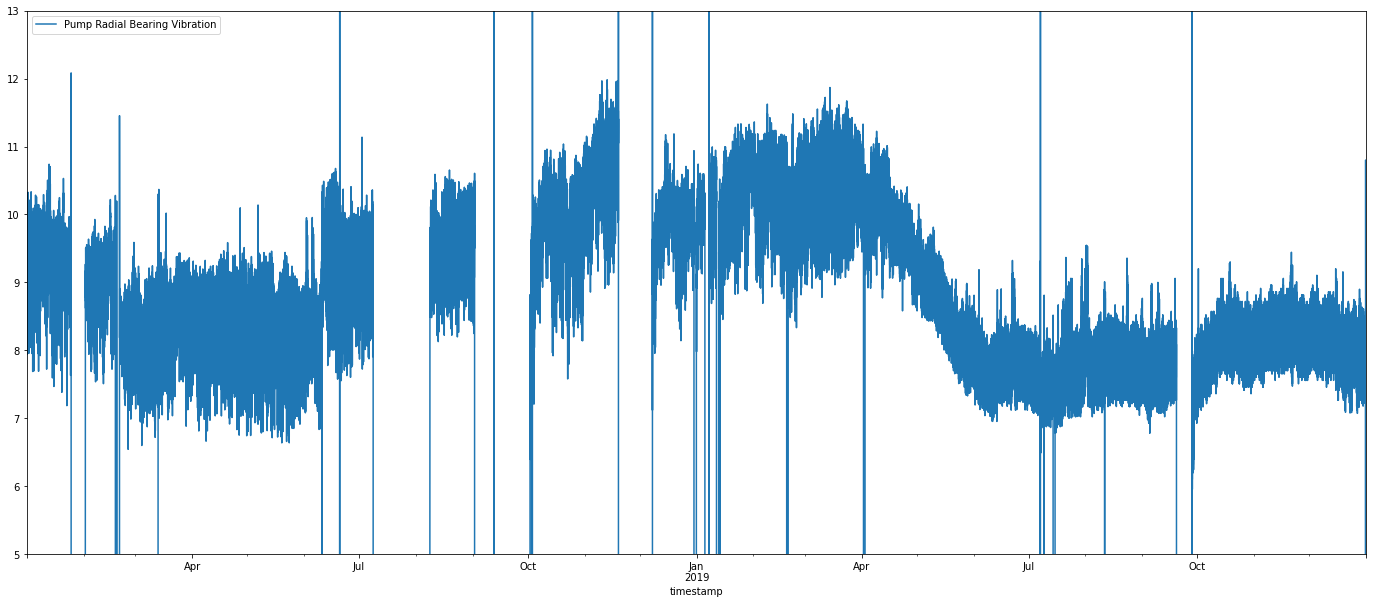

In [67]:
# Load the dataframe
target = pd.read_csv("data/sensor_data.csv", usecols = ['timestamp', 'Pump Radial Bearing Vibration'])
target['timestamp'] = pd.to_datetime(target.timestamp)
# Visualizing Target variable
target.plot(x='timestamp', y='Pump Radial Bearing Vibration', figsize=[24,10],ylim=(5,13))
plt.show()

- From the above graph, it can be clearly observed that the operating range of Pump Radial Bearing Vibration has abruptly change from june/may, 2019 onwards. 
- The vibration range from june,2019 onwards is 7-9 units.
- So, something has occured with the equipment from june,2019 onwards that has caused this downshift in the vibration's range. 

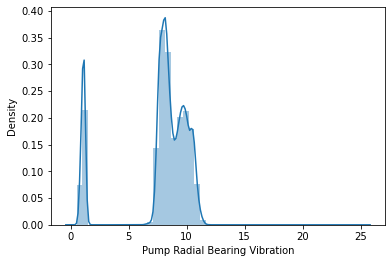

In [68]:
sns.distplot(target['Pump Radial Bearing Vibration'])
plt.show()

Selecting only running points

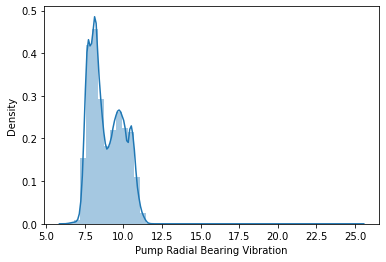

In [69]:
sns.distplot(target[target['Pump Radial Bearing Vibration']>6]['Pump Radial Bearing Vibration'])
plt.show()

The 2 peaks in the distribution plot might signify 2 different operating condtions of the pump radial bearing vibrations.
Therfore, we may need to separate the datasets into 2 periods.

In [70]:
from datetime import datetime

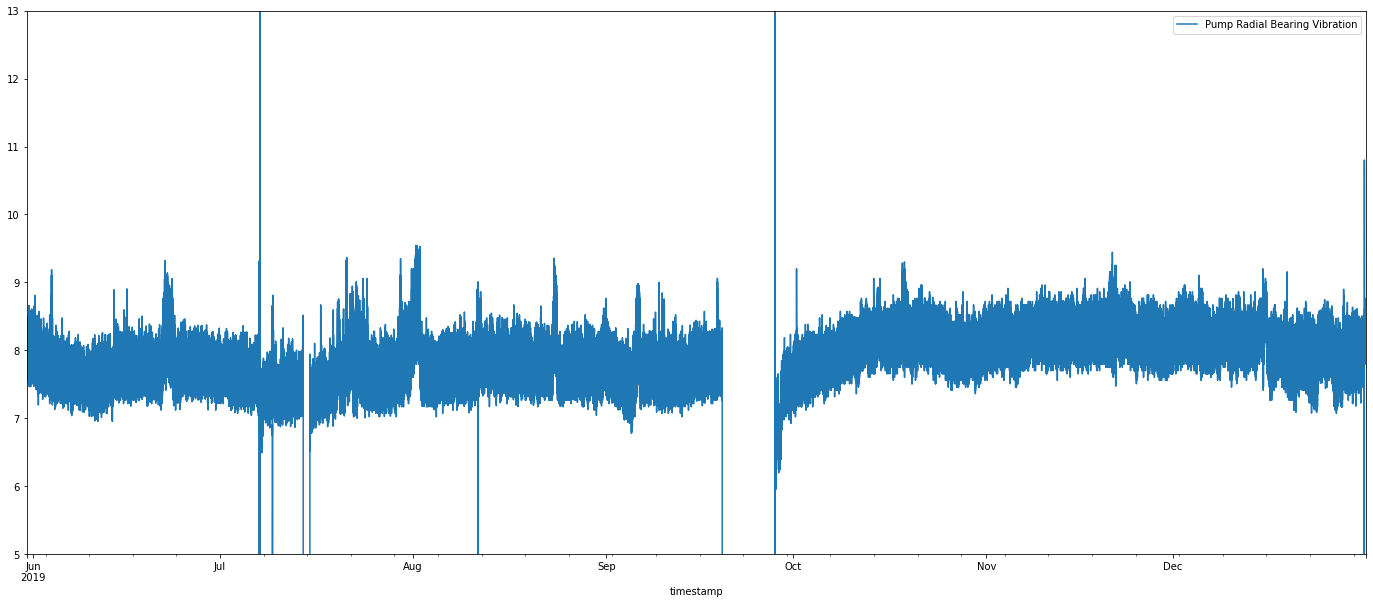

In [71]:
# Visualizing Target variable
target[pd.to_datetime(target.timestamp)>datetime.strptime('2019-05-31', '%Y-%m-%d')].plot(x='timestamp', y='Pump Radial Bearing Vibration', figsize=[24,10],ylim=(5,13))
plt.show()

In [24]:
clean_df = df[pd.to_datetime(df.timestamp)>datetime.strptime('2019-05-31', '%Y-%m-%d')].reset_index(drop=True)
clean_df.head()

NameError: name 'datetime' is not defined

In [ ]:
X = clean_df.drop(['timestamp','Pump Radial Bearing Vibration'], axis=1)
y = clean_df['Pump Radial Bearing Vibration']

In [ ]:
#XGB
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:6.83722
[1]	validation_0-mae:6.35863
[2]	validation_0-mae:5.91356
[3]	validation_0-mae:5.49963
[4]	validation_0-mae:5.11468
[5]	validation_0-mae:4.75669
[6]	validation_0-mae:4.42376
[7]	validation_0-mae:4.11413
[8]	validation_0-mae:3.82616
[9]	validation_0-mae:3.55836
[10]	validation_0-mae:3.30930
[11]	validation_0-mae:3.07769
[12]	validation_0-mae:2.86229
[13]	validation_0-mae:2.66195
[14]	validation_0-mae:2.47562
[15]	validation_0-mae:2.30237
[16]	validation_0-mae:2.14124
[17]	validation_0-mae:1.99139
[18]	validation_0-mae:1.85202
[19]	validation_0-mae:1.72241
[20]	validation_0-mae:1.60188
[21]	validation_0-mae:1.48977
[22]	validation_0-mae:1.38552
[23]	validation_0-mae:1.28855
[24]	validation_0-mae:1.19839
[25]	validation_0-mae:1.11453
[26]	validation_0-mae:1.03653
[27]	validation_0-mae:0.96401
[28]	validation_0-mae:0.89655
[29]	validation_0-mae:0.83382
[30]	validation_0-mae:0.77548
[31]	validation_0-mae:0.72122
[32]	validation_0-mae:0.67077
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,79.822777
1,Pump Journal 2 Bearing Temperature,24.907124
2,Pump Suction Strainer Differential Pressure,19.396027
3,Motor Current Phase A,7.221521
4,Pump Shaft Speed,5.738938
5,Heat Recovery System Header Mass Flow,4.508850
6,Motor Voltage,3.820340
7,Pump Suction Temperature,2.360665
8,Pump Journal 1 Bearing Temperature,2.315098
9,Pump Thrust Bearing Temperature 1,2.074746


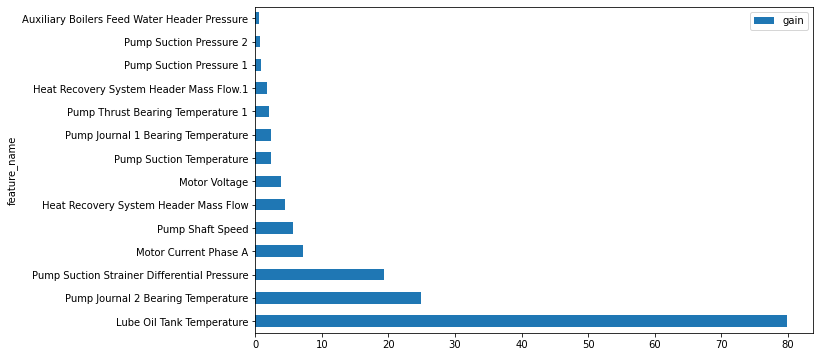

In [ ]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [ ]:
list(feature_score["feature_name"])[:10]
selected_cols = feature_score["feature_name"].values[:10]
selected_cols

array(['Lube Oil Tank Temperature', 'Pump Journal 2 Bearing Temperature',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Pump Shaft Speed',
       'Heat Recovery System Header Mass Flow', 'Motor Voltage',
       'Pump Suction Temperature', 'Pump Journal 1 Bearing Temperature',
       'Pump Thrust Bearing Temperature 1'], dtype=object)

After searching for various tuning algorithms other than Cross validation, I came across this bayesian optimization method in kaggle NYC fare data

https://www.kaggle.com/code/btyuhas/bayesian-optimization-with-xgboost/notebook

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols],y, train_size=0.6,test_size=0.4,random_state=42)

In [ ]:
def baye_opt(max_depth, min_child_weight, n_estimators, learning_rate, colsample_bytree):
            params_opt = {}
            params_opt['max_depth'] = int(max_depth)
            params_opt['min_child_weight'] = int(min_child_weight)
            params_opt['colsample_bytree'] = colsample_bytree
            params_opt['learning_rate'] = learning_rate
            params_opt['n_estimators'] = int(n_estimators)

            scores = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', 
                                                        tree_method='hist', 
                                                        **params_opt), 
                                                        X_train, y_train, 
                                                        scoring='neg_mean_absolute_error', 
                                                        cv=5).mean()
            return float(scores.mean())

# params = {'max_depth': (5, 11), 'min_child_weight':(4, 10), 'n_estimators': (70, 130), 'eta':(0.05, 0,12), 'colsample_bytree': (0.3, 0.9)}
params ={'max_depth':(8, 11),
            'min_child_weight': (3, 9),
            'colsample_bytree':(0.6, 1),
            'learning_rate':(0.05, 0.13),
            'n_estimators':(100, 120)
}
xgb_bo = BayesianOptimization(baye_opt, params)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=20, acq='ei')

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.1277   |  0.6903   |  0.06306  |  10.91    |  6.386    |  106.2    |
|  2        | -0.1253   |  0.6111   |  0.09453  |  10.02    |  6.217    |  105.9    |
|  3        | -0.1279   |  0.7782   |  0.128    |  8.285    |  3.838    |  104.5    |
|  4        | -0.1264   |  0.9795   |  0.06505  |  10.84    |  8.882    |  117.8    |
|  5        | -0.1274   |  0.6453   |  0.05933  |  10.2     |  3.168    |  114.8    |
|  6        | -0.1233   |  0.8597   |  0.1063   |  10.18    |  4.435    |  115.6    |
|  7        | -0.1247   |  0.7677   |  0.1261   |  9.068    |  3.682    |  116.7    |
|  8        | -0.1323   |  0.959    |  0.05728  |  8.328    |  7.638    |  115.5    |
|  9        | -0.1261   |  0.6321   |  0.07309  |  10.8     |  7.984    |  116.9    |
|  10       | -0.1291   |  0.8879   |  0.09654  |  8.1

In [ ]:
xgb_bo.max['params']

{'colsample_bytree': 0.9951696517903863,
 'learning_rate': 0.11703045335543556,
 'max_depth': 10.285570347094938,
 'min_child_weight': 4.532036474664715,
 'n_estimators': 105.93007441692288}

In [ ]:
regressor=xgb.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=xgb_bo.max['params']['learning_rate'], 
             max_depth=int(xgb_bo.max['params']['max_depth']), 
             min_child_weight=int(xgb_bo.max['params']['min_child_weight']),
             n_estimators=int(xgb_bo.max['params']['n_estimators']),
             colsample_bytree=xgb_bo.max['params']['colsample_bytree'],
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:6.49752
[1]	validation_0-rmse:5.73786
[2]	validation_0-rmse:5.06720
[3]	validation_0-rmse:4.47511
[4]	validation_0-rmse:3.95239
[5]	validation_0-rmse:3.49097
[6]	validation_0-rmse:3.08368
[7]	validation_0-rmse:2.72420
[8]	validation_0-rmse:2.40693
[9]	validation_0-rmse:2.12699
[10]	validation_0-rmse:1.87997
[11]	validation_0-rmse:1.66210
[12]	validation_0-rmse:1.46999
[13]	validation_0-rmse:1.30063
[14]	validation_0-rmse:1.15136
[15]	validation_0-rmse:1.01995
[16]	validation_0-rmse:0.90429
[17]	validation_0-rmse:0.80261
[18]	validation_0-rmse:0.71327
[19]	validation_0-rmse:0.63495
[20]	validation_0-rmse:0.56635
[21]	validation_0-rmse:0.50644
[22]	validation_0-rmse:0.45417
[23]	validation_0-rmse:0.40885
[24]	validation_0-rmse:0.36952
[25]	validation_0-rmse:0.33572
[26]	validation_0-rmse:0.30661
[27]	validation_0-rmse:0.28194
[28]	validation_0-rmse:0.26076
[29]	validation_0-rmse:0.24317
[30]	validation_0-rmse:0.22850
[31]	validation_0-rmse:0.21629
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9951696517903863, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.11703045335543556,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=105, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
y_pred = regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.7508
mean_squared_log_error:  0.0003
r2:  0.7508
MAE:  0.1175
MSE:  0.0225
RMSE:  0.1501


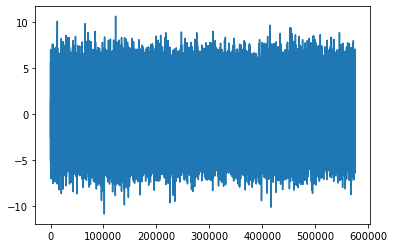

In [ ]:
perc_error_train = (y_train.values - y_pred)/y_train.values*100
plt.plot(perc_error_train)
plt.show()

In [ ]:
# Testing performance on test dataset
y_test_pred = regressor.predict(X_test)
regression_results(y_test.values, y_test_pred)

explained_variance:  0.7273
mean_squared_log_error:  0.0003
r2:  0.7273
MAE:  0.1226
MSE:  0.0246
RMSE:  0.1568


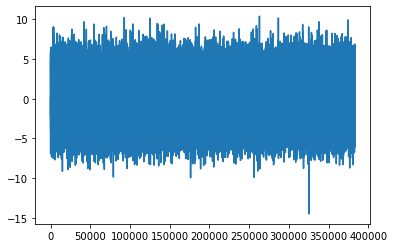

In [ ]:
perc_error_test = (y_test.values - y_test_pred)/y_test.values*100
plt.plot(perc_error_test)
plt.show()

In [ ]:
import pickle
pickle.dump(regressor, open('models/xgb_reg.pkl','wb'))

NameError: name 'regressor' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
knn_regressor = Pipeline([(('ScaledKNN', 
                            Pipeline([('Scaler', MinMaxScaler()),
                            ('KNN', KNeighborsRegressor())])))])


kfold = KFold(n_splits=10)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % ('ScaledKNN', cv_results.mean(), cv_results.std())
print(msg)

ScaledKNN: -0.028341 (0.000140)


In [ ]:
knn_regressor.fit(X_train, y_train)

Pipeline(steps=[('ScaledKNN',
                 Pipeline(steps=[('Scaler', MinMaxScaler()),
                                 ('KNN', KNeighborsRegressor())]))])

In [ ]:
y_pred = knn_regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.7926
mean_squared_log_error:  0.0002
r2:  0.7926
MAE:  0.1066
MSE:  0.0188
RMSE:  0.137


In [ ]:
y_pred = knn_regressor.predict(X_test)
regression_results(y_test.values, y_pred)

explained_variance:  0.6853
mean_squared_log_error:  0.0004
r2:  0.6853
MAE:  0.1312
MSE:  0.0284
RMSE:  0.1684


In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.26654562799773934
RMSE value for k=  2 is: 0.23289878891747484
RMSE value for k=  3 is: 0.2210672881034416
RMSE value for k=  4 is: 0.2153247679460001
RMSE value for k=  5 is: 0.21205772636128953
RMSE value for k=  6 is: 0.21006078050955293
RMSE value for k=  7 is: 0.20858837925185175
RMSE value for k=  8 is: 0.20764918469354116
RMSE value for k=  9 is: 0.20696142791893687
RMSE value for k=  10 is: 0.20646370117701426
RMSE value for k=  11 is: 0.2061246870838601
RMSE value for k=  12 is: 0.20586265749292185
RMSE value for k=  13 is: 0.2056741992695831
RMSE value for k=  14 is: 0.20559949358365784
RMSE value for k=  15 is: 0.20548613417953748
RMSE value for k=  16 is: 0.20541586385880486
RMSE value for k=  17 is: 0.20538577269851732
RMSE value for k=  18 is: 0.20538611938091159
RMSE value for k=  19 is: 0.2053680373009678
RMSE value for k=  20 is: 0.20538558436564272


<AxesSubplot:>

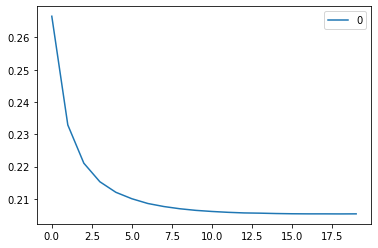

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
knn_regressor = Pipeline([(('ScaledKNN', 
                            Pipeline([('Scaler', MinMaxScaler()),
                            ('KNN', KNeighborsRegressor(n_neighbors=10))])))])

knn_regressor.fit(X_train, y_train)

Pipeline(steps=[('ScaledKNN',
                 Pipeline(steps=[('Scaler', MinMaxScaler()),
                                 ('KNN',
                                  KNeighborsRegressor(n_neighbors=10))]))])

In [ ]:
y_pred = knn_regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.7607
mean_squared_log_error:  0.0003
r2:  0.7607
MAE:  0.115
MSE:  0.0217
RMSE:  0.1471


In [ ]:
y_pred = knn_regressor.predict(X_test)
regression_results(y_test.values, y_pred)

explained_variance:  0.7052
mean_squared_log_error:  0.0003
r2:  0.7052
MAE:  0.1274
MSE:  0.0266
RMSE:  0.163


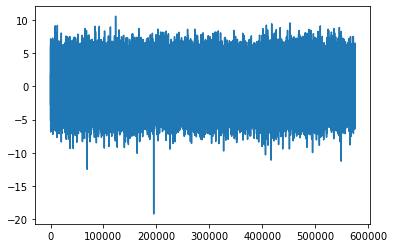

In [ ]:
perc_error_train = (y_train.values - y_pred)/y_train.values*100
plt.plot(perc_error_train)
plt.show()

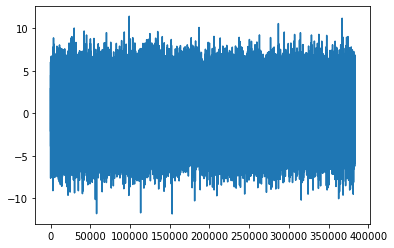

In [ ]:
perc_error_test = (y_test.values - y_pred)/y_test.values*100
plt.plot(perc_error_test)
plt.show()

In [ ]:
pickle.dump(knn_regressor, open('model/knn_regressor.pkl'))